In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import models
from torchvision.transforms import Normalize
from captum.attr import Saliency

/Users/guilherme/miniforge3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('mps')

# Create models
generator = models.GeneratorMNIST().to(device)
discriminator = models.DiscriminatorMNIST().to(device)

# Load weights (model.load_state_dict(torch.load(PATH)))
generator.load_state_dict(torch.load('results/xgan/mnist/weights/gen_epoch_4.pth', map_location=torch.device(device)))
discriminator.load_state_dict(torch.load('results/xgan/mnist/weights/disc_epoch_4.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [3]:
norm = Normalize((0.5,), (0.5,))

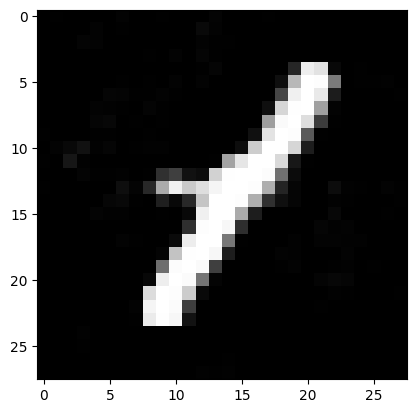

In [4]:
# Generate a fake sample
noise = torch.randn(1, 100, 1, 1, device=device)

fake = generator(noise)

img = fake.cpu().detach().numpy()
img = np.squeeze(img)

plt.imshow(img, cmap='gray')

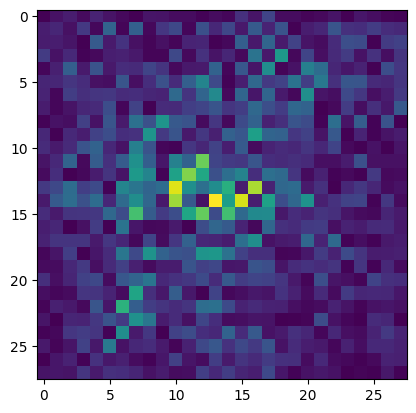

In [5]:
# Saliency
saliency = Saliency(discriminator)
explanation = saliency.attribute(fake)
explanation = norm(explanation)

grads_img = explanation.squeeze().cpu().detach().numpy()
plt.imshow(grads_img)

In [6]:
print(torch.max(fake))
print(torch.max(explanation))

tensor(0.9998, device='mps:0', grad_fn=<MaxBackward1>)
tensor(-0.9816, device='mps:0')


In [26]:
mse = torch.nn.L1Loss(reduction='none')

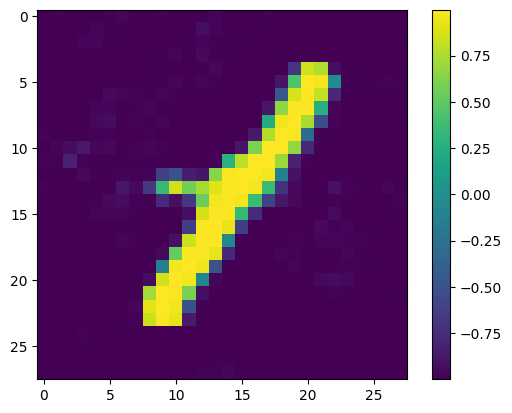

In [18]:
diff = fake * -explanation
# mse(fake, explanation)

diff_img = diff.squeeze().cpu().detach().numpy()
im = plt.imshow(diff_img)
plt.colorbar(im)

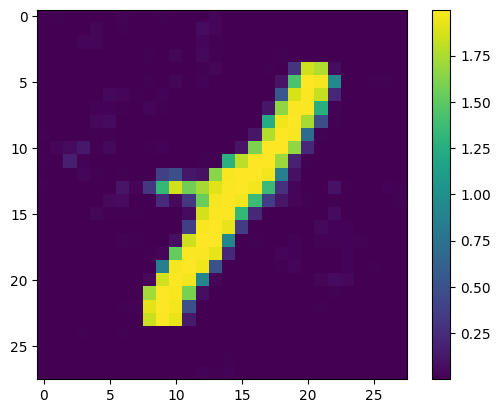

In [27]:
ed_loss = mse(fake, explanation)

loss_img = ed_loss.squeeze().cpu().detach().numpy()
im = plt.imshow(loss_img)
plt.colorbar(im)